# POSTTEST 6
# IMPORT PACKACE

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Untuk Melakukan Data Cleaning
from sklearn.impute import SimpleImputer
#Untuk K-Means
from sklearn.cluster import KMeans

# Melihat data csv 'Indonesia_coronavirus_daily_data.csv'

In [81]:
df = pd.read_csv('Indonesia_coronavirus_daily_data.csv')
df.head()

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2020-03-01,DKI JAKARTA,2,0,0,2,2,0,0,2
1,2020-03-02,DKI JAKARTA,2,0,0,2,4,0,0,4
2,2020-03-03,DKI JAKARTA,2,0,0,2,6,0,0,6
3,2020-03-04,DKI JAKARTA,2,0,0,2,8,0,0,8
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17613 entries, 0 to 17612
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    17613 non-null  object
 1   Province                17613 non-null  object
 2   Daily_Case              17613 non-null  int64 
 3   Daily_Death             17613 non-null  int64 
 4   Daily_Recovered         17613 non-null  int64 
 5   Active_Case             17613 non-null  int64 
 6   Cumulative_Case         17613 non-null  int64 
 7   Cumulative_Recovered    17613 non-null  int64 
 8   Cumulative_Death        17613 non-null  int64 
 9   Cumulative_Active_Case  17613 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.3+ MB


In [83]:
df.isna().sum()

Date                      0
Province                  0
Daily_Case                0
Daily_Death               0
Daily_Recovered           0
Active_Case               0
Cumulative_Case           0
Cumulative_Recovered      0
Cumulative_Death          0
Cumulative_Active_Case    0
dtype: int64

In [84]:
print(f'panjang dataset {len(df)} baris')

panjang dataset 17613 baris


# Melihat data csv 'data-jumlah-penduduk-berdasarkan-pendidikan-tahun-2021'

In [85]:
df2 = pd.read_csv('data-jumlah-penduduk-berdasarkan-pendidikan-tahun-2021.csv')
df2.head()

,tahun,nama_provinsi,nama_kabupaten,nama_kecamatan,nama_kelurahan,pendidikan,jumlah
0,2021,PROVINSI DKI JAKARTA,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,Tidak/Belum Sekolah,124
1,2021,PROVINSI DKI JAKARTA,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,Belum Tamat SD/Sederajat,747
2,2021,PROVINSI DKI JAKARTA,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,Tamat SD/Sederajat,1238
3,2021,PROVINSI DKI JAKARTA,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,SLTP/Sederajat,988
4,2021,PROVINSI DKI JAKARTA,ADM. KEPULAUAN SERIBU,KEPULAUAN SERIBU UTARA,PULAU PANGGANG,SLTA/Sederajat,2556


In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tahun           2666 non-null   int64 
 1   nama_provinsi   2666 non-null   object
 2   nama_kabupaten  2666 non-null   object
 3   nama_kecamatan  2666 non-null   object
 4   nama_kelurahan  2666 non-null   object
 5   pendidikan      2666 non-null   object
 6   jumlah          2666 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 145.9+ KB


In [87]:
df2.isna().sum()

tahun             0
nama_provinsi     0
nama_kabupaten    0
nama_kecamatan    0
nama_kelurahan    0
pendidikan        0
jumlah            0
dtype: int64

In [88]:
print(f'panjang dataset {len(df2)} baris')

panjang dataset 2666 baris


# DATA CLEANING

In [89]:
dataset_ns = df.copy()
dataset_ns2 = df2.copy()

In [90]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

# MODUS

In [91]:
dataset_ns2['jumlah'] = imputer_modus.fit_transform(dataset_ns2[['jumlah']])

dataset_ns2.isna().sum()

tahun             0
nama_provinsi     0
nama_kabupaten    0
nama_kecamatan    0
nama_kelurahan    0
pendidikan        0
jumlah            0
dtype: int64

# MEAN

In [92]:
dataset_ns2['jumlah'] = imputer_mean.fit_transform(dataset_ns2[['jumlah']])

dataset_ns2.isna().sum()

tahun             0
nama_provinsi     0
nama_kabupaten    0
nama_kecamatan    0
nama_kelurahan    0
pendidikan        0
jumlah            0
dtype: int64

# Menghapus record/feature

In [93]:
dataset_ns2.dropna(inplace=True)

dataset_ns2.isna().sum()

tahun             0
nama_provinsi     0
nama_kabupaten    0
nama_kecamatan    0
nama_kelurahan    0
pendidikan        0
jumlah            0
dtype: int64

In [94]:
len(dataset_ns)

17613

# DATA DUPLIKAT

In [95]:
dataset_duplicate = df.copy()

dataset_duplicate.duplicated().sum()

0

In [96]:
dataset_duplicate.drop_duplicates(inplace=True)

dataset_duplicate.duplicated().sum()

0

# K-MEANS

Algoritma ini menemukan kelompok data dengan nilai squared error antara rata-rata empiris dari cluster dan point di cluster minimum. Algoritma ini termasuk dalam clustering dengan pendekatan partitional.

In [97]:
dataset_ns.head()

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2020-03-01,DKI JAKARTA,2,0,0,2,2,0,0,2
1,2020-03-02,DKI JAKARTA,2,0,0,2,4,0,0,4
2,2020-03-03,DKI JAKARTA,2,0,0,2,6,0,0,6
3,2020-03-04,DKI JAKARTA,2,0,0,2,8,0,0,8
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7


In [98]:
model = KMeans(n_clusters=4)

In [99]:
point = dataset_ns[['Daily_Case','Daily_Death']]

In [100]:
model.fit(point)

KMeans(n_clusters=4)

In [101]:
label = model.labels_

In [102]:
label

array([0, 0, 0, ..., 0, 2, 0])

In [103]:
X = point['Daily_Case']
Y = point['Daily_Death']

In [104]:
centroid = model.cluster_centers_

In [105]:
centroid

array([[7.82900540e+01, 2.67664782e+00],
       [3.75596651e+03, 1.56143541e+02],
       [1.07414091e+03, 2.96717374e+01],
       [8.98925862e+03, 1.41758621e+02]])

In [106]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

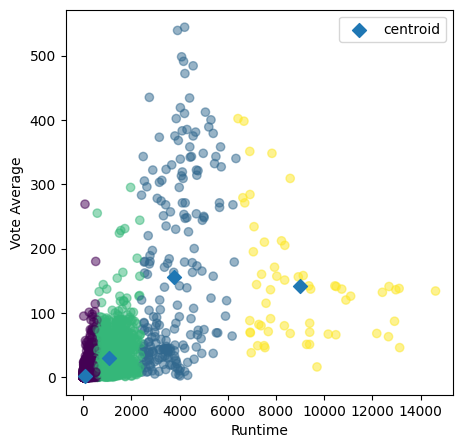

In [107]:
plt.figure(figsize=(5,5))
plt.scatter(X, Y, alpha=0.5, c=label)
plt.scatter(centroid_X, centroid_Y, marker='D', s=50, label='centroid')
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.legend()
plt.show()

In [108]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(point)
    inertias.append(model.inertia_)

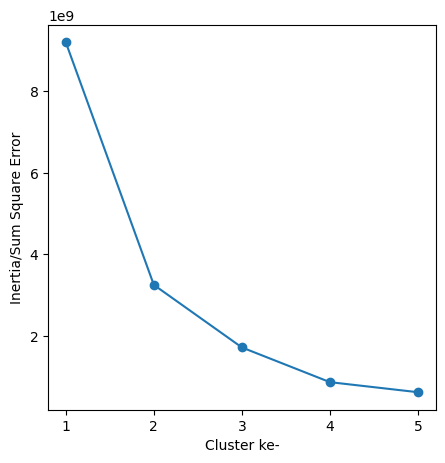

In [109]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke-')
plt.ylabel('Inertia/Sum Square Error')
plt.xticks(cluster_range)
plt.show()